Import necessary modules

In [1]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import pandas as pd
import random
%matplotlib inline

Define and visualize the graph

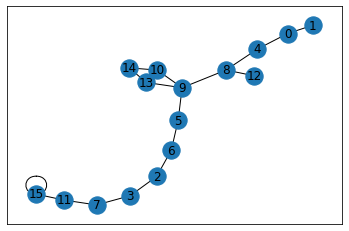

In [2]:
# Item a
# edges = [
#     (0,4),
#     (4,0),
#     (4,3),
#     (3,4),
#     (4,5),
#     (5,4),
#     (3,2),
#     (2,3),
#     (3,1),
#     (1,3),
#     (1,5),
#     (5,1),
#     (5,5)
# ]
# Item b
edges = [
    (0,1),
    (1,0),
    (0,4),
    (4,0),
    (4,8),
    (8,4),
    (8,12),
    (12,8),
    (8,9),
    (9,8),
    (9,13),
    (13,9),
    (13,14),
    (14,13),
    (14,10),
    (10,14),
    (10,9),
    (9,10),
    (9,5),
    (5,9),
    (5,6),
    (6,2),
    (2,6),
    (2,3),
    (3,2),
    (3,7),
    (7,3),
    (7,11),
    (11,7),
    (11,15),
    (15,11),
    (15,15)]
G = nx.Graph()
G.add_edges_from(edges)
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G,pos)
nx.draw_networkx_edges(G,pos)
nx.draw_networkx_labels(G,pos)
plt.show()

Initialize Reward and Q matrix:

In [3]:
objective = 15
R = np.matrix(np.zeros(shape=(int(np.size(G.nodes)),int(np.size(G.nodes)))))
for x in G[objective]:
    R[x,objective] = 100
pd.DataFrame(R)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


To eliminate impossible actions, their Q-values are set -100. 

In [4]:
Q = np.matrix(np.zeros(shape=(int(np.size(G.nodes)),int(np.size(G.nodes)))))
Q -= 100
for node in G.nodes:
    for x in G[node]:
        Q[node,x] = 0
        Q[x,node] = 0
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
2,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0
8,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0,-100.0
9,-100.0,-100.0,-100.0,-100.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,0.0,-100.0,-100.0,0.0,-100.0,-100.0


In [23]:
pd.DataFrame(R).to_latex('latex/R.tex')
pd.DataFrame(Q).to_latex('latex/Qinit.tex')

C:\Users\gabri\AppData\Local\Temp\ipykernel_10552\3312940784.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pd.DataFrame(R).to_latex('latex/R.tex')
C:\Users\gabri\AppData\Local\Temp\ipykernel_10552\3312940784.py:2: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pd.DataFrame(Q).to_latex('latex/Qinit.tex')


Define a function which takes a starting node and returns the next node. It also accepts an exploration rate for random exploration. Otherwise, it chooses action according to the highest Q value of the possible actions.

In [5]:
def next_number(start,er):
    random_value = random.uniform(0, 1) # chooses a random number between 0 and 1
    if random_value < er: # if the random number is below the threshold, it chooses next action randomly
        sample=G[start]
    else:
        sample = np.where(Q[start,] == np.max(Q[start,]))[1]
    next_node = int(np.random.choice(sample,1))
    return next_node

After, we need a function for updating Q-value of the action taken

In [6]:
def updateQ(node1,node2, lr, discount):
    max_index = np.where(Q[node2,] == np.max(Q[node2,]))[1] # finds the index of the highest Q-value
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index= int(max_index)
    max_value = Q[node2, max_index]
    Q[node1, node2] = int((1 - lr) * Q[node1, node2] + lr * (R[node1, node2] + discount * max_value)) # update the Q-value

Now it is time to improve Q-values by starting at random nodes and making XXXX walk

In [7]:
def learn(er, lr, discount):
    for i in range(50000):
        start = np.random.randint(0, int(np.size(G.nodes)))
        next_node = next_number(start, er)
        updateQ(start, next_node, lr, discount)

EXPLORATION_RATE = 0.5
LEARNING_RATE = 0.8
DISCOUNT_FACTOR = 0.8
learn(EXPLORATION_RATE, LEARNING_RATE, DISCOUNT_FACTOR) #  Set exploration rate, learning rate and discount factor of the learning

Let’s check the final Q-values

In [8]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-100.0,38.0,-100.0,-100.0,62.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
1,49.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
2,-100.0,-100.0,-100.0,250.0,-100.0,-100.0,158.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
3,-100.0,-100.0,199.0,-100.0,-100.0,-100.0,-100.0,314.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
4,49.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,79.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
5,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,158.0,-100.0,-100.0,100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
6,-100.0,-100.0,199.0,-100.0,-100.0,126.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0
7,-100.0,-100.0,-100.0,250.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,-100.0,394.0,-100.0,-100.0,-100.0,-100.0
8,-100.0,-100.0,-100.0,-100.0,62.0,-100.0,-100.0,-100.0,-100.0,100.0,-100.0,-100.0,62.0,-100.0,-100.0,-100.0
9,-100.0,-100.0,-100.0,-100.0,-100.0,126.0,-100.0,-100.0,79.0,-100.0,79.0,-100.0,-100.0,79.0,-100.0,-100.0


In [28]:
pd.DataFrame(Q).to_latex('latex/Qlearn.tex')

C:\Users\gabri\AppData\Local\Temp\ipykernel_10552\3406513945.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  pd.DataFrame(Q).to_latex('latex/Qlearn.tex')


Now we can find shortest path between X and Y, by choosing highest Q-value from Q matrix when deciding an action:

In [9]:
def shortest_path(begin, end):
    path = [begin]
    next_node = np.argmax(Q[begin,])
    path.append(next_node)
    while next_node != end:
        next_node = np.argmax(Q[next_node,])
        path.append(next_node)
    return path

In [11]:
print(shortest_path(9,15))

[9, 5, 6, 2, 3, 7, 11, 15]
